In [1]:
import numpy as np
import pickle
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(os.path.join('/global/cscratch1/sd/vboehm/SDSSOutlier/results/','training_set.csv'))
df_valid = pd.read_csv(os.path.join('/global/cscratch1/sd/vboehm/SDSSOutlier/results/','validation_set.csv'))
df_test  = pd.read_csv(os.path.join('/global/cscratch1/sd/vboehm/SDSSOutlier/results/','test_set.csv'))

In [3]:
plotpath= '/global/u2/v/vboehm/codes/SDSS_PAE/figures/relabeled_retrained'

In [4]:
df_test = pd.concat([df_test,df_valid]).reset_index()

In [5]:
RUN             = '1'

seeds           = {'1':5123, '2':879, '3':9981, '4': 20075, '5': 66, '6': 276, '7': 936664}

conditional     = False
cond_on         = 'type'

root_model_data = '/global/cscratch1/sd/vboehm/Datasets/sdss/by_model/'
root_models     = '/global/cscratch1/sd/vboehm/Models/SDSS_AE/'
root_encoded    = '/global/cscratch1/sd/vboehm/Datasets/encoded/sdss/'
root_decoded    = '/global/cscratch1/sd/vboehm/Datasets/decoded/sdss/'


wlmin, wlmax    = (3388,8318)
fixed_num_bins  = 1000
min_SN          = 50
min_z           = 0.05
max_z           = 0.36
label           = 'galaxies_quasars_bins%d_wl%d-%d'%(fixed_num_bins,wlmin,wlmax)
label_          = label+'_minz%s_maxz%s_minSN%d'%(str(int(min_z*100)).zfill(3),str(int(max_z*100)).zfill(3),min_SN)
label_2         = label_+'_10_fully_connected_mean_div'


plotpath        = '/global/homes/v/vboehm/codes/SDSS_PAE/figures'


if conditional:
    label_2='conditional_%s'%cond_on+label_2

In [6]:
train,valid,test,le = pickle.load(open(os.path.join(root_model_data,'combined_%s_new_relabeled.pkl'%label_),'rb'))

In [8]:
test_={}
for key in test.keys():
    if len(test[key].shape)>2:
        print(key)
        test_[key] = np.vstack((test[key], valid[key]))
    else:
        try:
            test_[key] = np.vstack((np.expand_dims(test[key],-1),np.expand_dims( valid[key],-1)))
            print(key)
        except:
            pass
spec = test_['spec']
mask = test_['mask']

spec
mask
noise
z
RA
DEC
class
subclass
SN
MJD
plate
fiber
mean
std
new_inf_labels
new_label
new_logp
old_logp


In [9]:
decoded_AE1_train,decoded_AE1_valid, decoded_AE1_test, mean_AE1, mean_AE1 = np.load(os.path.join(root_decoded,'decoded_%s_RUN%s_new.npy'%(label_2,RUN)),allow_pickle=True)

In [10]:
decoded_AE1_test = np.vstack([decoded_AE1_test,decoded_AE1_valid])

In [11]:
wlmin, wlmax      = (3388,8318)
fixed_num_bins    = 1000
wl_range          = (np.log10(wlmin),np.log10(wlmax))
new_wl            = np.logspace(wl_range[0],wl_range[1],fixed_num_bins+1)

In [12]:
df_test.rename(columns={' mjd':'MJD',' fiber':'fiber','plate':'plate'},inplace=True)
df_train.rename(columns={' mjd':'MJD',' fiber':'fiber','plate':'plate'},inplace=True)
labels        = np.concatenate((df_train['new_label'].to_numpy(),df_test['new_label'].to_numpy()))

In [13]:
encoded_train, encoded_valid, encoded_test = np.load(os.path.join(root_encoded,'encoded_AE2_%s_RUN%s.npy'%(label_2,RUN)), allow_pickle=True)
encoded_test = np.vstack((encoded_test,encoded_valid))
# merge train and test set
encoded_comp  = encoded_train #np.vstack((encoded_train,encoded_test))

In [14]:
decoded          = {} 
decoded['train'],decoded['valid'], decoded['test'], mean, std  = np.load(os.path.join(root_decoded,'decoded_AE2_%s.npy'%(label_2)), allow_pickle=True)
decoded['test'] = np.vstack((decoded['test'],decoded['valid']))
#merge train and test set
decoded_comp    = decoded['train']#np.vstack((decoded['train'],decoded['test']))

In [15]:
df_test['ind1'] = np.arange(len(df_test))

In [16]:
top_outliers         = pd.read_csv('top8_logp_results_by_z.csv')
top_outliers['ind2'] = np.arange(len(top_outliers)) 

In [17]:
top_outliers

,Unnamed: 0,level_0,MJD,fiber,plate,RA,logp,z,recon_error,logp_z_corrected,recon_error_std_AE1,recon_error_AE1,DEC,z-bin,ind2
0,135114,65292,52405,429,954,180.76,-32.11,0.07,1.17,-36.60,2.02,0.58,60.52,1,0
1,120080,50258,51691,640,350,261.13,-26.84,0.08,5.66,-29.09,68.91,10.13,64.93,1,1
2,41266,41266,51820,45,429,27.30,-23.78,0.07,3.02,-27.27,7.21,2.06,13.07,1,2
3,23135,23135,51955,247,472,137.91,-22.17,0.07,9.93,-26.01,24.60,8.68,-0.71,1,3
4,61461,61461,52258,399,412,47.03,-20.49,0.07,1.38,-23.81,3.36,0.82,0.46,1,4
5,1541,1541,53520,126,1657,244.10,-19.38,0.05,25.57,-25.71,8.70,5.28,22.52,1,5
6,32939,32939,53149,192,1649,228.34,-19.16,0.07,3.69,-22.86,12.61,2.15,30.95,1,6
7,670,670,53084,388,1440,168.91,-19.14,0.05,14.39,-25.46,52.23,10.32,42.05,1,7
8,64916,64916,52232,83,762,128.84,-25.72,0.09,0.80,-26.72,1.92,0.75,42.66,2,8
9,122167,52345,53386,368,1755,174.04,-25.54,0.11,1.06,-23.87,2.38,0.77,15.85,2,9


In [18]:
res     = df_test.merge(top_outliers,how='inner',on=['plate','MJD','fiber'])
indices = res.sort_values('ind2')['ind1']

In [19]:
encoded_an = encoded_test[indices]
decoded_an = decoded['test'][indices]

In [20]:
spec = spec[indices]
mask = mask[indices]

In [21]:
df_test = df_test.loc[indices]

In [22]:
decoded_AE1_test = decoded_AE1_test[indices]

In [23]:
import sys
sys.path.append('/global/u2/v/vboehm/codes/SIG_GIS/')
from sig_gis import *
from sig_gis.GIS import *
device   = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
model = torch.load(os.path.join(root_models,'conditional_SINF_%s_inpainted_denoised_data_relabeled'%(label_2)))
model = model.to(device)

In [25]:
len(df_test)

40

In [20]:
for param in model.parameters():
    param.requires_grad = False
    

num_steps = 40  # how many optim steps to take
updates   = []
logps     = []

def logp(x,label):
    return torch.mean(-model.evaluate_density(x,label))

model.requires_grad_(False)
x     = torch.nn.Parameter(torch.Tensor(encoded_an).to(device), requires_grad=True)
label = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
optim = torch.optim.SGD([x], lr=1e-1)#, max_iter=3, history_size=10, line_search_fn=None)#'strong_wolfe')
logp_ = logp(x,label)
logps.append(logp_.cpu().detach().numpy())
for jj in range(num_steps):
    optim.zero_grad()
    updates.append(x.cpu().detach().numpy())
    logp_ = logp(x,label)
    logp_.backward()
    logps.append(logp_.cpu().detach().numpy())
    print(logp_)
    optim.step()#lambda: logp(x,label))

In [100]:
np.save('40_min_1e-1.npy',[updates,logps])

/global/homes/v/vboehm/.conda/envs/pytorch/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [101]:
res = np.load('40_min_1e-1.npy', allow_pickle=True)
x = res[0][-1]

In [102]:
model = model.to(device)

for param in model.parameters():
    param.requires_grad = False


num_steps = 60  # how many optim steps to take
updates   = []
logps     = []

def logp(x,label):
    return torch.mean(-model.evaluate_density(x,label))

model.requires_grad_(False)
x     = torch.nn.Parameter(torch.Tensor(x).to(device), requires_grad=True)
label = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
optim = torch.optim.SGD([x], lr=1e-1)
logp_ = logp(x,label)
logps.append(logp_.cpu().detach().numpy())
for jj in range(num_steps):
    optim.zero_grad()
    updates.append(x.cpu().detach().numpy())
    logp_ = logp(x,label)
    logp_.backward()
    logps.append(logp_.cpu().detach().numpy())
    print(logp_)
    optim.step()
    
np.save('100_min_1e-1.npy',[updates,logps])



tensor(24.8734, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.5523, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.8039, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.2103, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.0999, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.4812, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.2357, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.7374, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.4223, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.1094, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.1725, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.3773, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.0842, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(23.9952, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(23.6467, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.5338, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(24.3641, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(23.8924

In [107]:
res = np.load('100_min_1e-1.npy', allow_pickle=True)
x = res[0][-1]

In [109]:
num_steps = 100 
updates   = []
logps     = []
model.requires_grad_(False)
x     = torch.nn.Parameter(torch.Tensor(x).to(device), requires_grad=True)
label = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
optim = torch.optim.SGD([x], lr=1e-2)
logp_ = logp(x,label)
logps.append(logp_.cpu().detach().numpy())
for jj in range(num_steps):
    optim.zero_grad()
    updates.append(x.cpu().detach().numpy())
    logp_ = logp(x,label)
    logp_.backward()
    logps.append(logp_.cpu().detach().numpy())
    print(logp_)
    optim.step()
    
np.save('200_min_1e-2.npy',[updates,logps])

tensor(22.3002, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(22.0468, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.8628, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.7574, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.6741, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.7164, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5445, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5737, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.6245, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5704, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5826, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5505, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5614, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5440, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.6606, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5141, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5507, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.5122

In [21]:
res = np.load('200_min_1e-2.npy', allow_pickle=True)
x = res[0][-1]

num_steps = 200 
updates   = []
logps     = []
model.requires_grad_(False)
label = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
x     = torch.nn.Parameter(torch.Tensor(x).to(device), requires_grad=True)
optim = torch.optim.Adam([x], lr=1e-2)
logp_ = logp(x,label)
logps.append(logp_.cpu().detach().numpy())
for jj in range(num_steps):
    optim.zero_grad()
    updates.append(x.cpu().detach().numpy())
    logp_ = logp(x,label)
    logp_.backward()
    logps.append(logp_.cpu().detach().numpy())
    print(logp_)
    optim.step()
    
np.save('400_min_1e-2.npy',[updates,logps])

tensor(21.0891, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(21.1195, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.9213, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.9306, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.8741, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.8049, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.7798, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.7194, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.6615, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.6101, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.5689, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.5314, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.4866, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.4431, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.4037, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.3704, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.3350, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(20.2933

/global/homes/v/vboehm/.conda/envs/pytorch/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [22]:
path = os.path.join(root_decoded,'decoder_AE2_%s_run%s_inpainted_denoised'%(label_2, RUN))

In [23]:
### find nearest neighbors of new encoded spectra

In [24]:
df_test['plate']

135114     954
120080     350
41266      429
23135      472
61461      412
1541      1657
32939     1649
670       1440
64916      762
122167    1755
19561     2513
90863      435
10117     1833
34156     2236
139430     498
18165     1270
134921    1709
24317      294
106707    1928
5063      1587
136444    2099
78762      443
64720      288
2006       285
46562     1436
25000     1755
82907      285
32614      961
10238      470
92341     1623
634        934
47942     2532
56687     2112
13798      757
66858      607
123986    1195
136323    1805
64826      610
49280     1953
25535     1750
Name: plate, dtype: int64

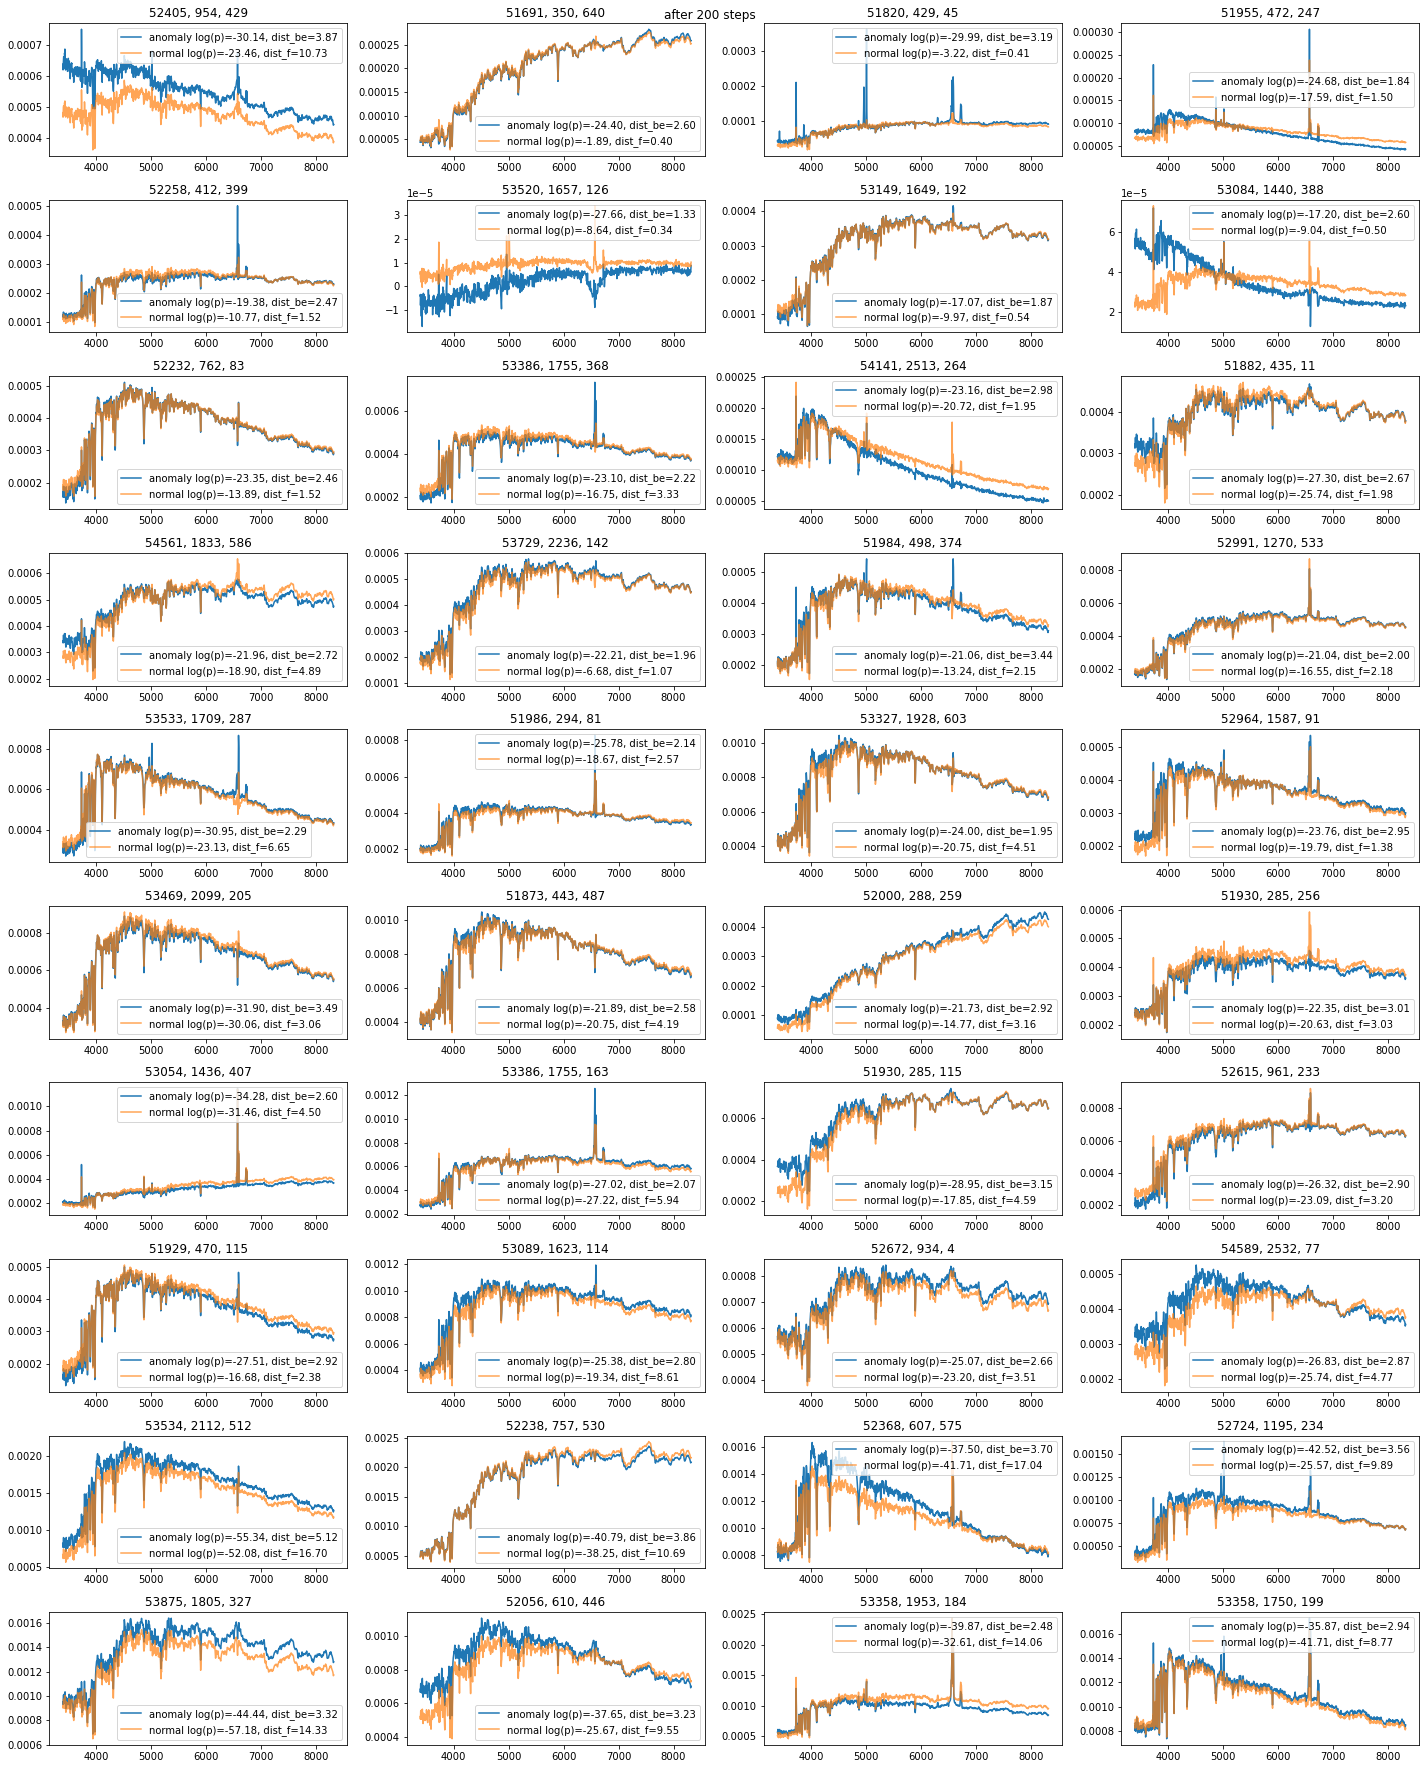

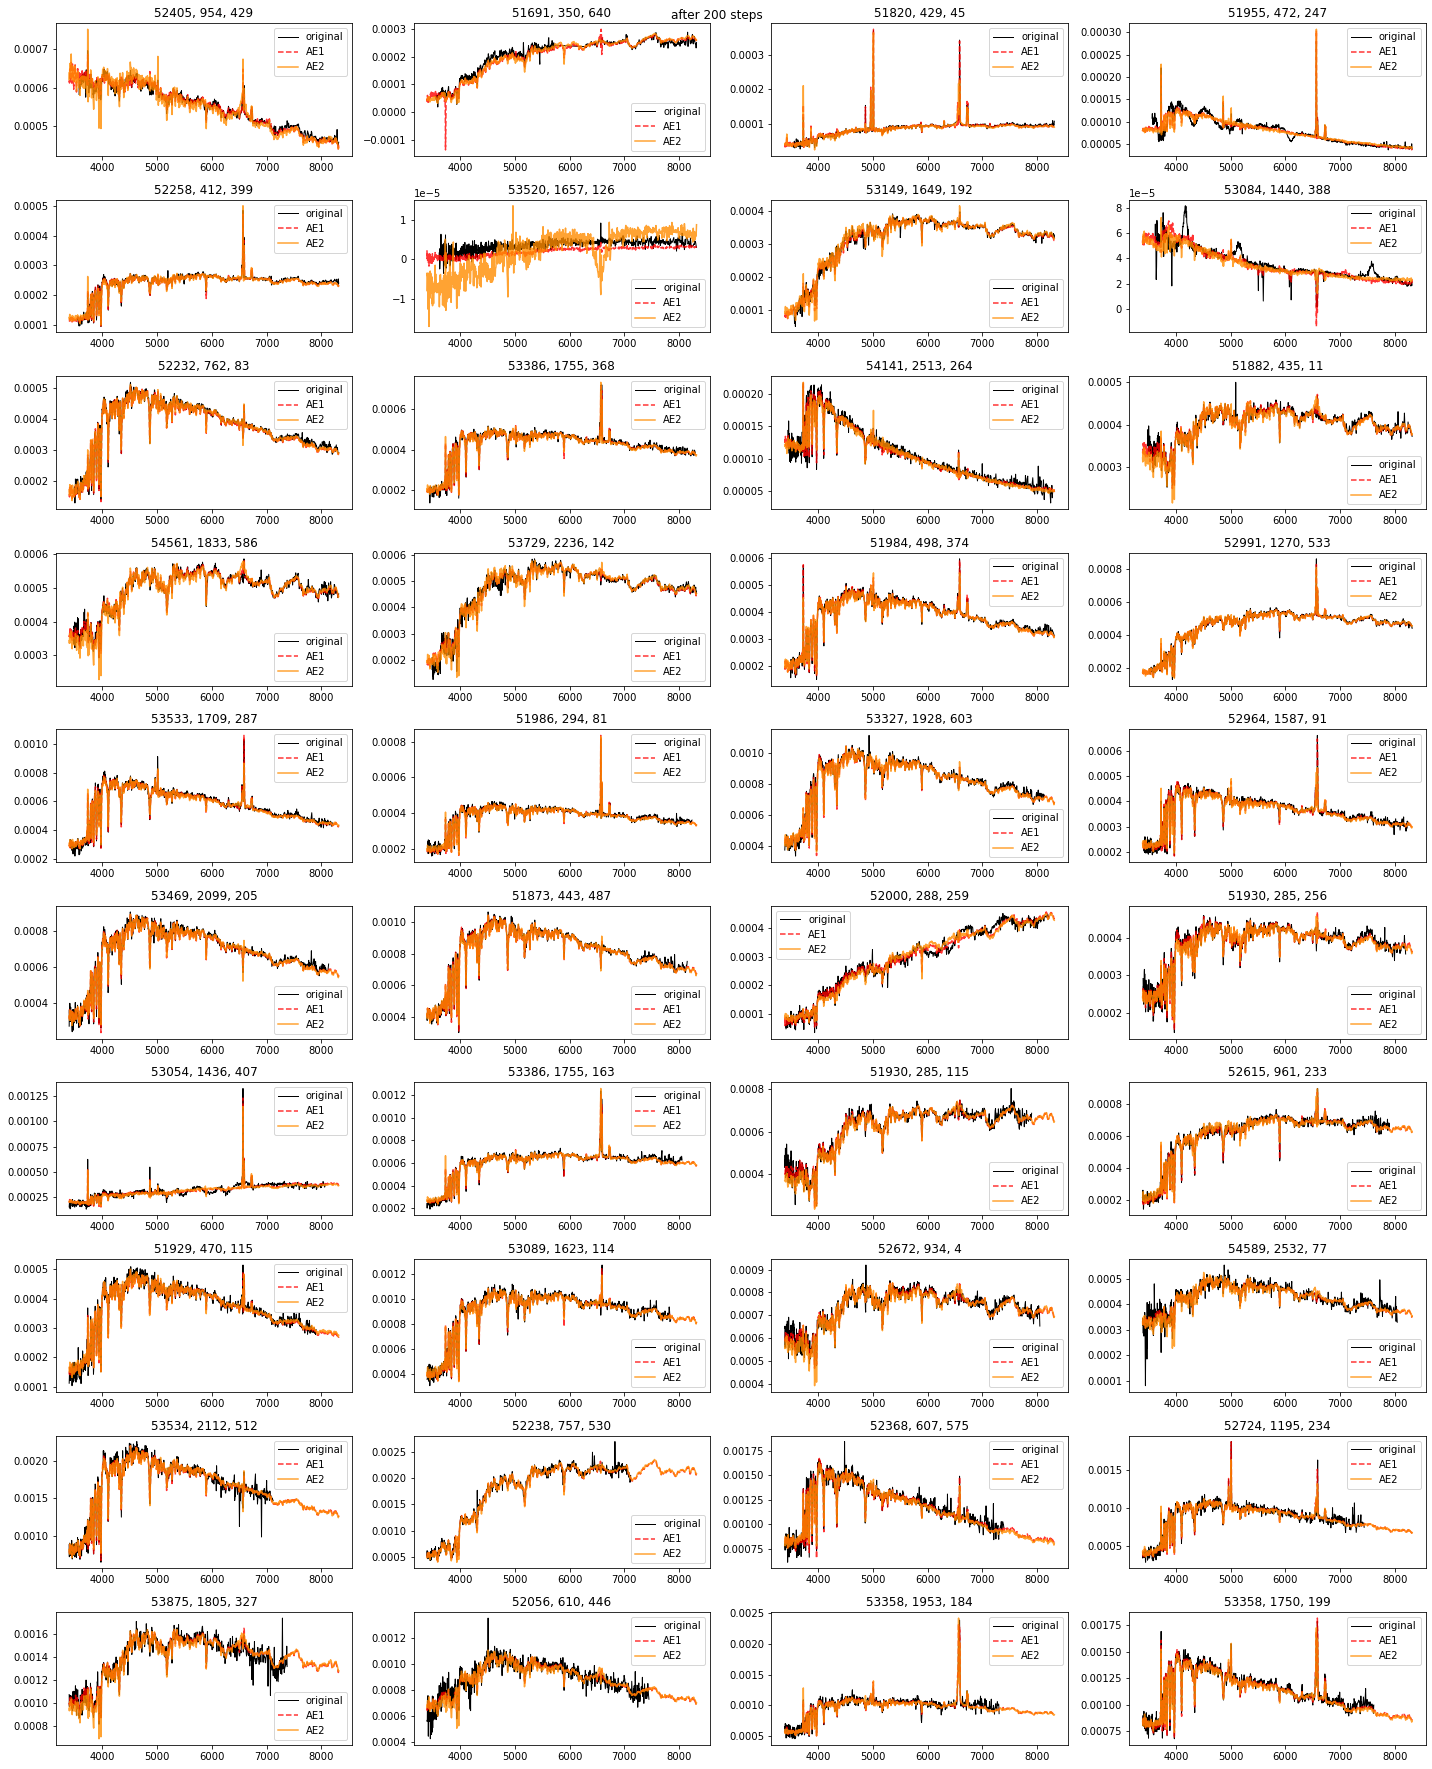

In [33]:
from scipy.spatial import KDTree as KDTree

# load minmization results
updates,logps = np.load('400_min_1e-2.npy', allow_pickle=True)

# get final encoded position after minimization
updates = np.asarray(updates)
final_guess = updates[-1,:,:] 


# construct KDTree
tree = KDTree(encoded_comp, leafsize=10)
# find nearest neighbors of final positions
dist_f, ind = tree.query(final_guess, k=1)

dist_be = np.sqrt(np.sum((final_guess-encoded_an)**2,axis=1))

#evaluate initial logps before minimization
enc_test_an_tensor   = torch.nn.Parameter(torch.Tensor(encoded_an).to(device), requires_grad=True)
# df_test has been shortened already
label_test_an_tensor = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
logp_test            = model.evaluate_density(enc_test_an_tensor, label = label_test_an_tensor).detach().cpu().numpy()

# evaluate nearest neighbors of final position with same labels
NN_comp        = torch.Tensor(encoded_comp[ind]).to(device)
#label_train    = torch.Tensor(labels[ind]).to(device) #torch.Tensor(df_train['new_label'].to_numpy()[ind]).to(device)
logp_train     = model.evaluate_density(NN_comp, label = label_test_an_tensor).detach().cpu().numpy()

df_test = df_test.reset_index(drop=True)

fig, ax = plt.subplots(10,4,figsize=(20,25))
fig.suptitle('after 200 steps')
ax = ax.flatten()
for ii in range(40):
#    if ii==0:
    ax[ii].set_title('%d, %d, %d'%(df_test['MJD'][ii], df_test['plate'][ii], df_test['fiber'][ii]))
    ax[ii].plot(new_wl[1:],decoded_an[ii]/new_wl[1:], label='anomaly log(p)=%.2f, dist_be=%.2f'%(logp_test[ii],dist_be[ii]))
    ax[ii].plot(new_wl[1:],decoded_comp[ind[ii]]/new_wl[1:],alpha=0.7, label='normal log(p)=%.2f, dist_f=%.2f'%(logp_train[ii],dist_f[ii]))
    ax[ii].legend()
plt.tight_layout()
plt.savefig(os.path.join(plotpath,'400steps.pdf'), bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(10,4,figsize=(20,25))
fig.suptitle('after 200 steps')
ax = ax.flatten()
for ii in range(40):
#    if ii==0:
    ax[ii].set_title('%d, %d, %d'%(df_test['MJD'][ii], df_test['plate'][ii], df_test['fiber'][ii]))
    ax[ii].plot(new_wl[1:][np.where(mask[ii])[0]],np.squeeze(spec[ii][np.where(mask[ii])[0]])/new_wl[1:][np.where(mask[ii])[0]],color='black',lw=1, label='original')
    ax[ii].plot(new_wl[1:],decoded_AE1_test[ii]/new_wl[1:],ls='--', alpha=0.8, color='red',label='AE1')
    ax[ii].plot(new_wl[1:],decoded_an[ii]/new_wl[1:],alpha=0.8, color='darkorange',label='AE2')
    #ax[ii].plot(new_wl[1:],decoded_comp[ind[ii]]/new_wl[1:],alpha=0.6)
    ax[ii].legend()
plt.tight_layout()
plt.savefig(os.path.join(plotpath,'400steps_additional_lines.pdf'), bbox_inches='tight')
plt.show()

In [47]:
new_wl.shape

(1001,)

In [39]:
(new_wl[1:][np.where(mask[ii])[0]]).shape#,spec[ii][np.where(mask[ii])]/new_wl[1:][np.where(mask[ii])],color='red')


(901,)

In [46]:
(spec[ii][np.where(mask[ii])[0]]/new_wl[:,1:][np.where(mask[ii])[0]])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

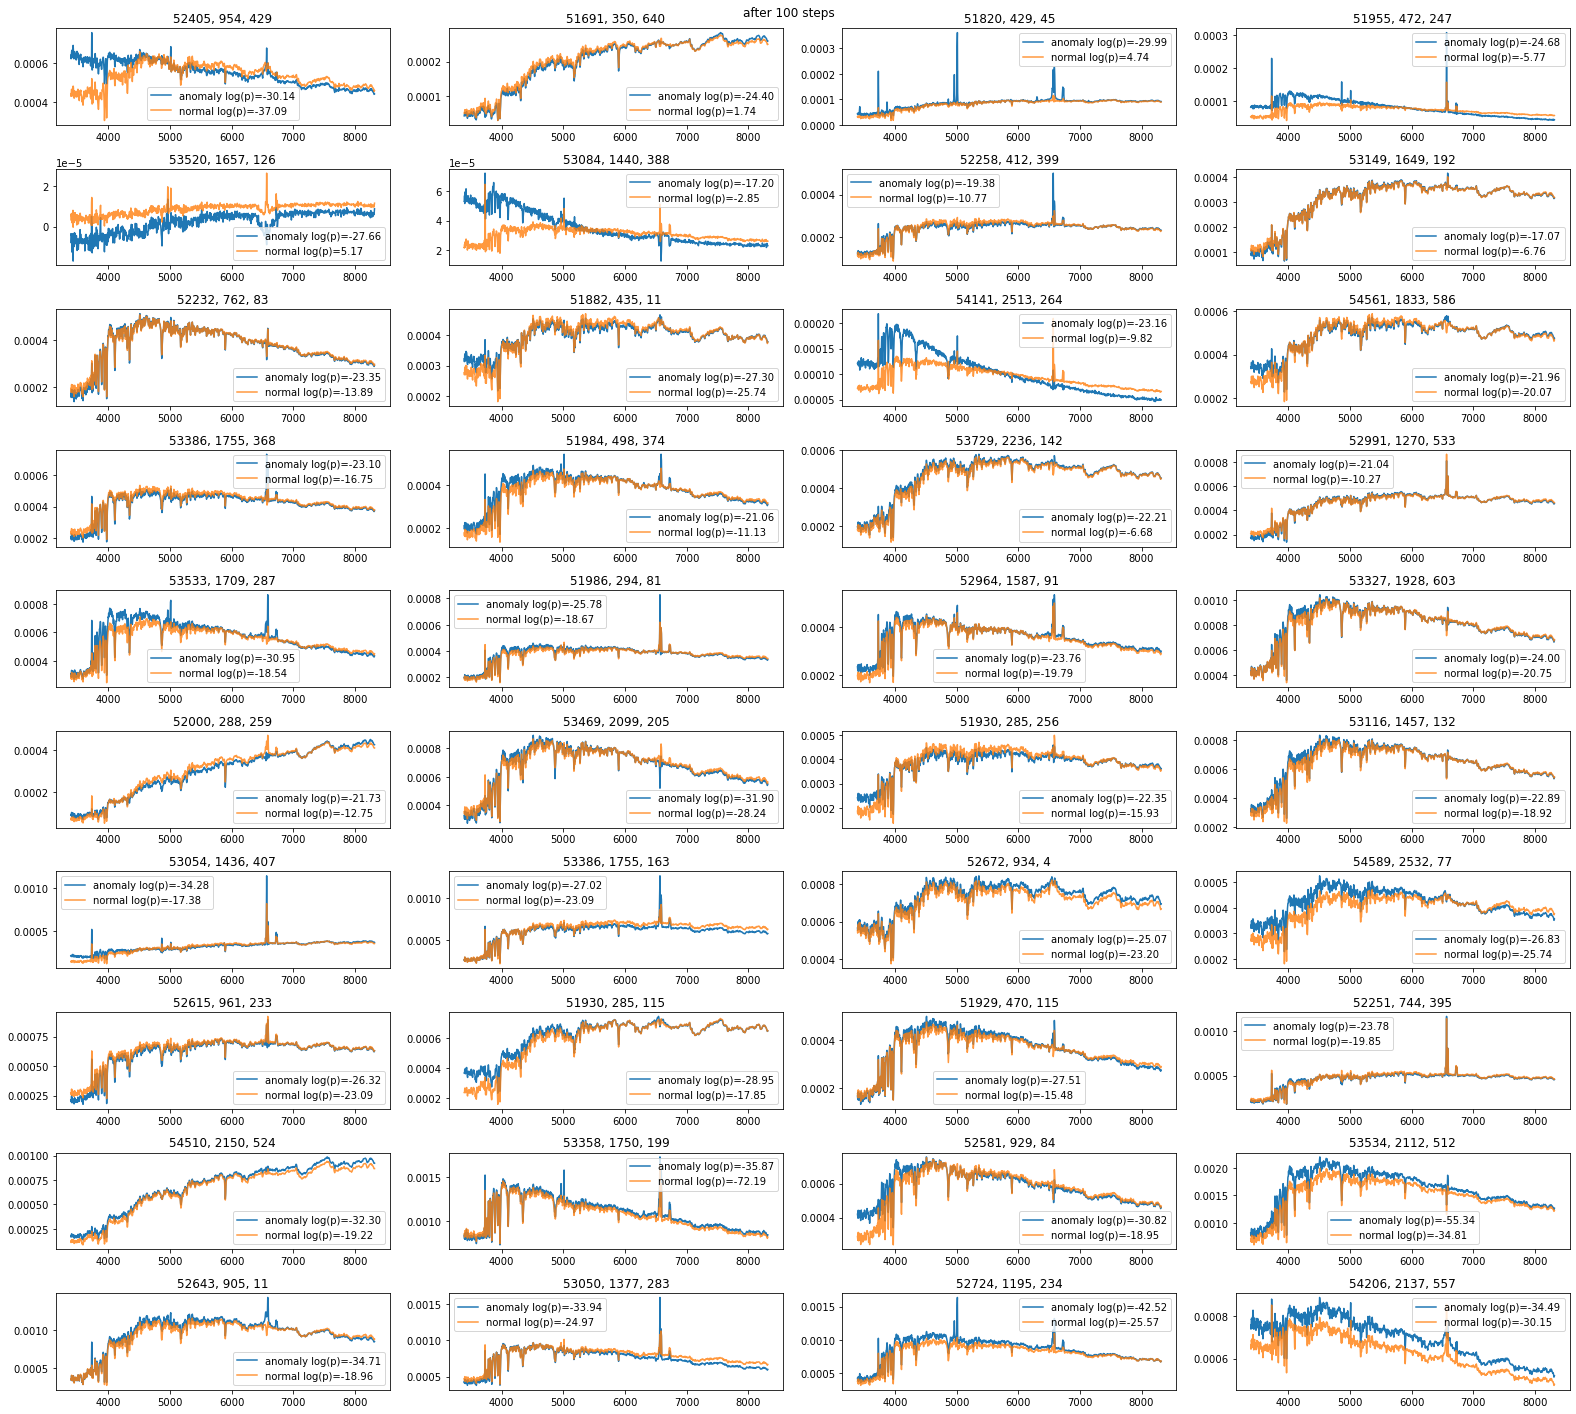

In [23]:
updates,logps = np.load('200_min_1e-2.npy', allow_pickle=True)


updates = np.asarray(updates)

final_guess = updates[0,:,:] 

from scipy.spatial import KDTree as KDTree

tree = KDTree(encoded_train, leafsize=10)

dis, ind = tree.query(final_guess, k=1)

NN_train       = torch.Tensor(encoded_train[ind]).to(device)
label_train    = torch.Tensor(df_train['new_label'].to_numpy()[ind]).to(device)
logp_train     = model.evaluate_density(NN_train, label = label_train).detach().cpu().numpy()

enc_test_an_tensor   = torch.nn.Parameter(torch.Tensor(encoded_an).to(device), requires_grad=True)
label_test_an_tensor = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
logp_test = model.evaluate_density(enc_test_an_tensor, label = label_test_an_tensor).detach().cpu().numpy()

len(enc_test_an_tensor)

fig, ax = plt.subplots(10,4,figsize=(22,20))
fig.suptitle('after 100 steps')
ax = ax.flatten()
for ii in range(40):
#    if ii==0:
    ax[ii].set_title('%d, %d, %d'%(df_test['MJD'][ii], df_test['plate'][ii], df_test['fiber'][ii]))
    ax[ii].plot(new_wl[1:],decoded_an[ii]/new_wl[1:], label='anomaly log(p)=%.2f'%logp_test[ii])
    ax[ii].plot(new_wl[1:],decoded['train'][ind[ii]]/new_wl[1:],alpha=0.8, label='normal log(p)=%.2f'%logp_train[ii])
    ax[ii].legend()
plt.tight_layout()
plt.savefig(os.path.join(plotpath,'100steps.pdf'), bbox_inches='tight')
plt.show()

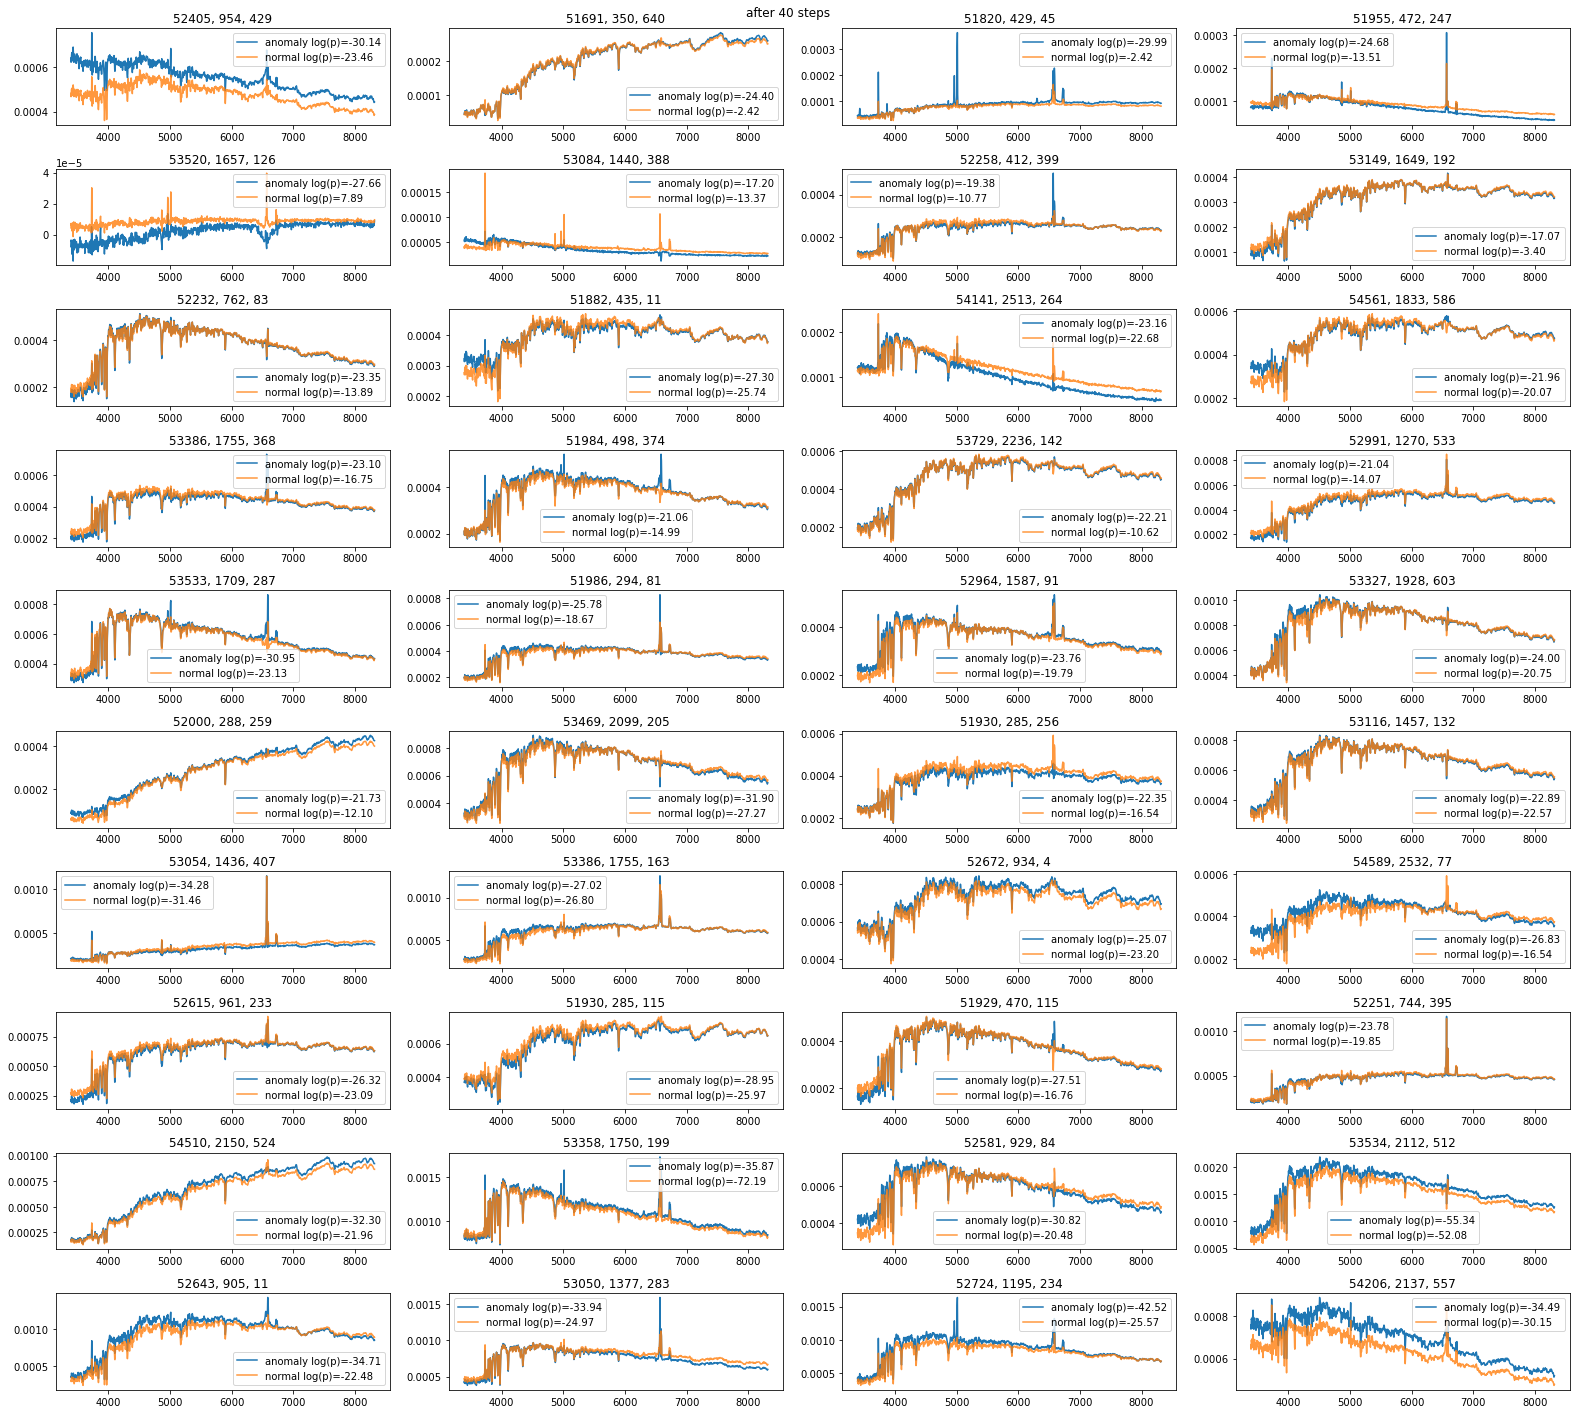

In [24]:
updates,logps = np.load('40_min_1e-2.npy', allow_pickle=True)


updates = np.asarray(updates)

final_guess = updates[-1,:,:] 

from scipy.spatial import KDTree as KDTree

tree = KDTree(encoded_train, leafsize=10)

dis, ind = tree.query(final_guess, k=1)

NN_train       = torch.Tensor(encoded_train[ind]).to(device)
label_train    = torch.Tensor(df_train['new_label'].to_numpy()[ind]).to(device)
logp_train     = model.evaluate_density(NN_train, label = label_train).detach().cpu().numpy()

enc_test_an_tensor   = torch.nn.Parameter(torch.Tensor(encoded_an).to(device), requires_grad=True)
label_test_an_tensor = torch.Tensor(df_test['new_label'].to_numpy()).to(device)
logp_test = model.evaluate_density(enc_test_an_tensor, label = label_test_an_tensor).detach().cpu().numpy()

len(enc_test_an_tensor)

fig, ax = plt.subplots(10,4,figsize=(22,20))
ax = ax.flatten()
fig.suptitle('after 40 steps')
for ii in range(40):
#    if ii==0:
    ax[ii].set_title('%d, %d, %d'%(df_test['MJD'][ii], df_test['plate'][ii], df_test['fiber'][ii]))
    ax[ii].plot(new_wl[1:],decoded_an[ii]/new_wl[1:], label='anomaly log(p)=%.2f'%logp_test[ii])
    ax[ii].plot(new_wl[1:],decoded['train'][ind[ii]]/new_wl[1:],alpha=0.8, label='normal log(p)=%.2f'%logp_train[ii])
    ax[ii].legend()
plt.tight_layout()
plt.savefig(os.path.join(plotpath,'40steps.pdf'), bbox_inches='tight')

plt.show()